In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/M148 Project/Datasets/Filtered for our 5 states/merged_with_modified_features.csv"
data = pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = data.drop(data.columns[0], axis=1)
data.columns

Index(['id', 'category', 'bathrooms', 'bedrooms', 'has_photo', 'price',
       'square_feet', 'cityname', 'state', 'latitude', 'longitude', 'county',
       'violent_crime_rate', 'property_crime_rate', 'population', 'density',
       'dist_highway', 'dist2_large_airport', 'dist2_medium_airport',
       'dist_to_shore', 'number_of_business', 'adjusted_gross_income',
       'total_income_amount', 'number_of_returns', 'Civilian_labor_force_2022',
       'Median_Household_Income_2021', 'risk_score', 'risk_rating', 'avg_temp',
       'allows_cats', 'allows_dogs', 'has_Refrigerator', 'has_Playground',
       'has_Internet.Access', 'has_Cable.or.Satellite', 'has_Elevator',
       'has_Clubhouse', 'has_Patio.Deck', 'has_Washer.Dryer', 'has_Pool',
       'has_Tennis', 'has_Basketball', 'has_Luxury', 'has_Doorman', 'has_View',
       'has_Wood.Floors', 'has_Dishwasher', 'has_Hot.Tub', 'has_Parking',
       'has_Gym', 'has_Alarm', 'has_Garbage.Disposal', 'has_Storage',
       'has_nan', 'has_Golf

In [4]:
# Check for duplicates
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


# Examining Data Distribution

## Summary Statistics

In [5]:
from tabulate import tabulate


# Generate summary statistics
summary_stats = data.describe()

# Split summary statistics table into two parts

# First Table
table1 = summary_stats.iloc[:, 1:15]

# Second Table
table2 = summary_stats.iloc[:, 15:25]

# Second Table
table3 = summary_stats.iloc[:, 25:]


# Format the summary statistics into a nice table
formatted_table1 = tabulate(table1, headers='keys', tablefmt='fancy_grid', showindex=True)
formatted_table2 = tabulate(table2, headers='keys', tablefmt='fancy_grid', showindex=True)
formatted_table3 = tabulate(table3, headers='keys', tablefmt='fancy_grid', showindex=True)

# Print the formatted table
print(formatted_table1)
print(formatted_table2)
print(formatted_table3)

╒═══════╤══════════════╤══════════════╤══════════════╤══════════╤═══════════════╤═════════════╤═════════════╤══════════════════════╤═══════════════════════╤══════════════╤═══════════╤════════════════╤═══════════════════════╤════════════════════════╕
│       │    bathrooms │     bedrooms │    has_photo │    price │   square_feet │    latitude │   longitude │   violent_crime_rate │   property_crime_rate │   population │   density │   dist_highway │   dist2_large_airport │   dist2_medium_airport │
╞═══════╪══════════════╪══════════════╪══════════════╪══════════╪═══════════════╪═════════════╪═════════════╪══════════════════════╪═══════════════════════╪══════════════╪═══════════╪════════════════╪═══════════════════════╪════════════════════════╡
│ count │ 18356        │ 18300        │ 18362        │ 18362    │     18362     │ 18362       │ 18362       │            18009     │             18009     │      18308   │  18308    │ 18308          │           18308       │            18308       │


In [6]:
pd.set_option('display.float_format', '{:.4f}'.format)
data.describe().round(4).T

,count,mean,std,min,25%,50%,75%,max
id,18362.0000,5350766476.8683,184574208.5857,5121046673.0000,5197910728.0000,5198613567.0000,5509034520.7500,5668643368.0000
bathrooms,18356.0000,1.4707,0.5784,1.0000,1.0000,1.0000,2.0000,9.0000
bedrooms,18300.0000,1.7049,0.7628,0.0000,1.0000,2.0000,2.0000,8.0000
has_photo,18362.0000,0.8984,0.3022,0.0000,1.0000,1.0000,1.0000,1.0000
price,18362.0000,1986.8872,1438.0806,350.0000,1272.2500,1724.0000,2376.0000,52500.0000
square_feet,18362.0000,926.6494,414.3276,116.0000,700.0000,870.0000,1083.0000,11000.0000
latitude,18362.0000,36.6943,4.8841,31.3517,33.7574,34.0911,37.6250,48.7871
longitude,18362.0000,-117.8430,3.2479,-124.2265,-119.8972,-118.1629,-115.3519,-109.5450
violent_crime_rate,18009.0000,498.0516,228.9806,60.3380,354.2455,535.7214,670.7332,1403.5680
property_crime_rate,18009.0000,2881.8582,954.3515,996.2702,2477.4166,2611.9891,3054.2391,6738.2419


## Identifying Outliers

In [7]:
# Select only the numeric columns
numeric_data = data.drop(data.columns[[0, 1]], axis=1).select_dtypes(include=['number'])

# Calculate IQR for numerical columns
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = ((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR)))

# Flatten the outliers DataFrame and count the number of outliers in each column
outliers_count = outliers.sum()

# Combine outliers info into a data frame
outliers_info = pd.DataFrame({
    'Number of Outliers': outliers_count
})

# Format the table using tabulate for better visualization
formatted_outliers_info = tabulate(outliers_info, headers='keys', tablefmt='fancy_grid', showindex=True)

# Print the formatted table
print(formatted_outliers_info)

╒══════════════════════════════╤══════════════════════╕
│                              │   Number of Outliers │
╞══════════════════════════════╪══════════════════════╡
│ bathrooms                    │                   67 │
├──────────────────────────────┼──────────────────────┤
│ bedrooms                     │                  350 │
├──────────────────────────────┼──────────────────────┤
│ has_photo                    │                 1866 │
├──────────────────────────────┼──────────────────────┤
│ price                        │                  707 │
├──────────────────────────────┼──────────────────────┤
│ square_feet                  │                  626 │
├──────────────────────────────┼──────────────────────┤
│ latitude                     │                 2863 │
├──────────────────────────────┼──────────────────────┤
│ longitude                    │                    0 │
├──────────────────────────────┼──────────────────────┤
│ violent_crime_rate           │                

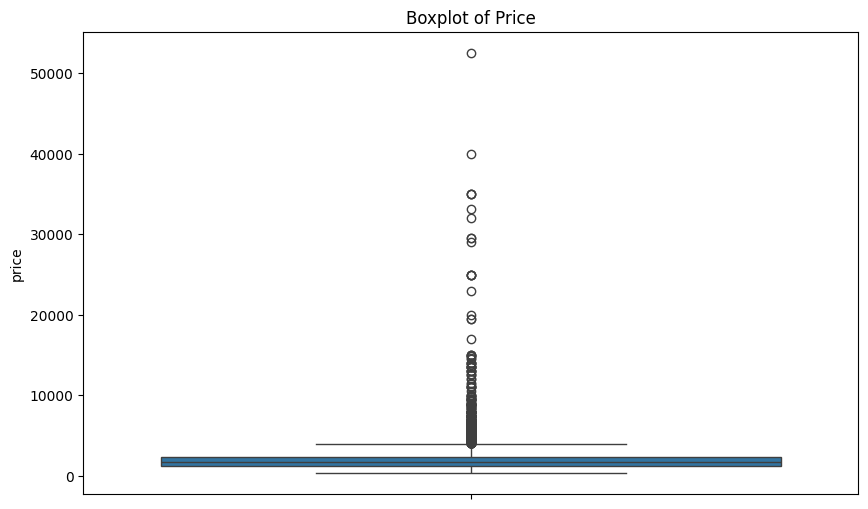

In [8]:
# Visualize outliers using box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=data['price'])
plt.title('Boxplot of Price')
plt.show()

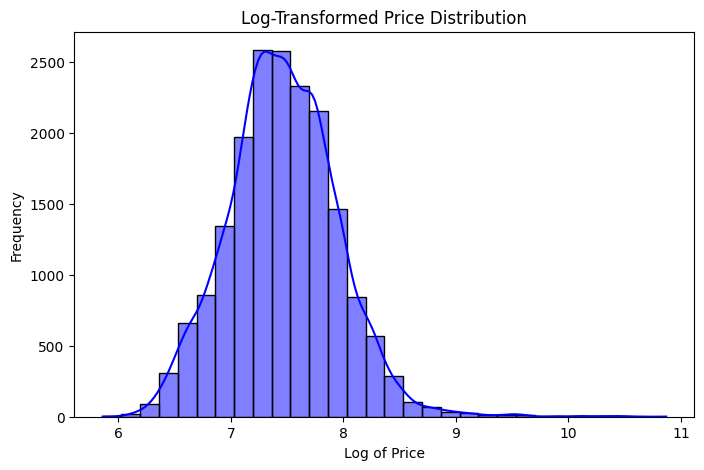

In [9]:
# Apply log transformation to the 'price' column
data["log_price"] = np.log1p(data["price"])

# Plot histogram
plt.figure(figsize=(8, 5))
sns.histplot(data["log_price"], bins=30, kde=True, color='blue')
plt.xlabel('Log of Price')
plt.ylabel('Frequency')
plt.title('Log-Transformed Price Distribution')
plt.show()

## Bar Plots by County

In [10]:
# Import data
m_df = pd.read_csv("/content/drive/MyDrive/M148 Project/Datasets/Filtered for our 5 states/merged.csv", low_memory=False)
m_df = m_df.drop(m_df.columns[0], axis=1)

# Changing Risk_Rating to Numerical
risk_mapping = {
    "Very Low": 0.0,
    "Relatively Low": 0.25,
    "Relatively Moderate": 0.5,
    "Relatively High": 0.75,
    "Very High": 1.0
}
m_df['risk_rating'] = m_df['risk_rating'].map(risk_mapping)

In [11]:
# Separating m_df into category of data above
violent_crime_df = m_df[['county', 'violent_crime_rate']]
property_crime_df = m_df[['county', 'property_crime_rate']]
proximity_df = m_df[['county', 'dist_highway',
                     'dist2_large_airport', 'dist2_medium_airport',
                     'dist_to_shore', 'number_of_business']]
unemployment_df = m_df[['county', 'Unemployment_rate_2017', # ********************** Not keeping other years because crime data
                        # only had 2017-2019, and including unemployment rate of other years would be misrepresentative
                        'Unemployment_rate_2018', 'Unemployment_rate_2019']]
temperature_df = m_df[['county', 'avg_temp']]
disaster_df = m_df[['county', 'risk_score', 'risk_rating']]

In [12]:
# Grouping each category's data frame by county
# Mean Violent and Property Crime, by county
mean_vc_by_county = violent_crime_df.groupby('county')['violent_crime_rate'].mean()
mean_pc_by_county = property_crime_df.groupby('county')['property_crime_rate'].mean()

# Proximity to things by county
mean_dist_highway_by_county = proximity_df.groupby('county')['dist_highway'].mean()
# L for large, M for medium
mean_dist2_L_airport_by_county = proximity_df.groupby('county')['dist2_large_airport'].mean()
mean_dist2_M_airport_by_county = proximity_df.groupby('county')['dist2_medium_airport'].mean()
mean_dist2_shore_by_county = proximity_df.groupby('county')['dist_to_shore'].mean()
# mean number of businesses in proximity
mean_num_business_by_county = proximity_df.groupby('county')['number_of_business'].mean()

# Unemployment rates by county
grouped_unemployment = unemployment_df.groupby('county').mean()
grouped_unemployment['Mean_Unemployment_Rate'] = grouped_unemployment.mean(axis=1)
mean_unemp_by_county = grouped_unemployment.Mean_Unemployment_Rate

# Mean Temperature by county
mean_temp_by_county = temperature_df.groupby('county')['avg_temp'].mean()

# Meam Risk scores for natural disasters by county
mean_rs_by_county = disaster_df.groupby('county')['risk_score'].mean()
mean_rr_by_county = disaster_df.groupby('county')['risk_rating'].mean()

In [13]:
mean_vc_by_county.count()

60

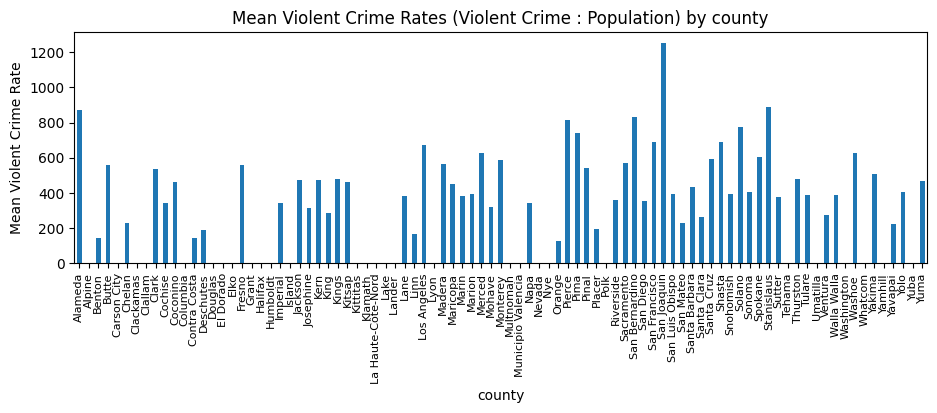

In [14]:
# 1a. violent crime rates = # violent crimes / # population
mean_vc_by_county.plot(x='county', y='violent_crime_rate', kind='bar', figsize = (11, 3))
plt.title('Mean Violent Crime Rates (Violent Crime : Population) by county')
plt.xlabel('county')
plt.ylabel('Mean Violent Crime Rate')
plt.tick_params(axis='x', which='major', labelsize=8)
plt.show()

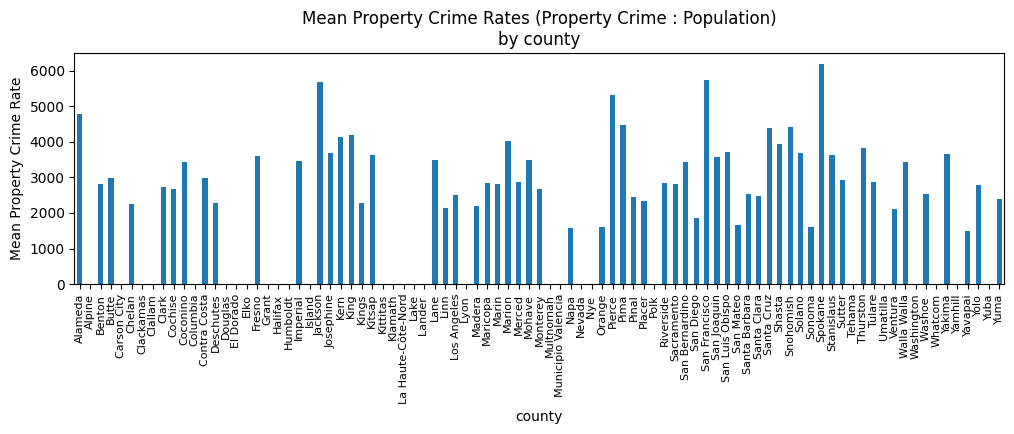

In [15]:
# 1b. Mean Property Crime Rate
mean_pc_by_county.plot(x='county', y='property_crime_rate', kind='bar', figsize = (12, 3))
plt.title('Mean Property Crime Rates (Property Crime : Population)\nby county')
plt.xlabel('county')
plt.ylabel('Mean Property Crime Rate')
plt.tick_params(axis='x', which='major', labelsize=8)
plt.show()
#plt.savefig('/content/drive/MyDrive/Colab Notebooks/M148 Datasets/M148 Plots/Mean Property Crime Rates (Property Crime : Population) by county.png')

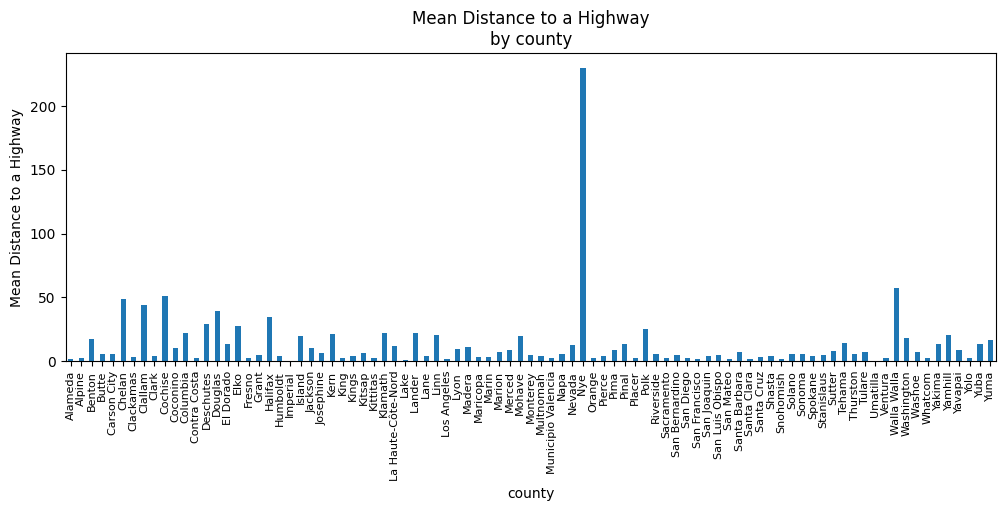

In [16]:
# 2. proximity to things
# To highway
mean_dist_highway_by_county.plot(x='county', y='dist_highway', kind='bar', figsize=(12,4))
plt.title('Mean Distance to a Highway\nby county')
plt.xlabel('county')
plt.ylabel('Mean Distance to a Highway')
plt.tick_params(axis='x', which='major', labelsize=8)
plt.show()
#plt.savefig('/content/drive/MyDrive/Colab Notebooks/M148 Datasets/M148 Plots/Mean Distance to a Highway by county.png')

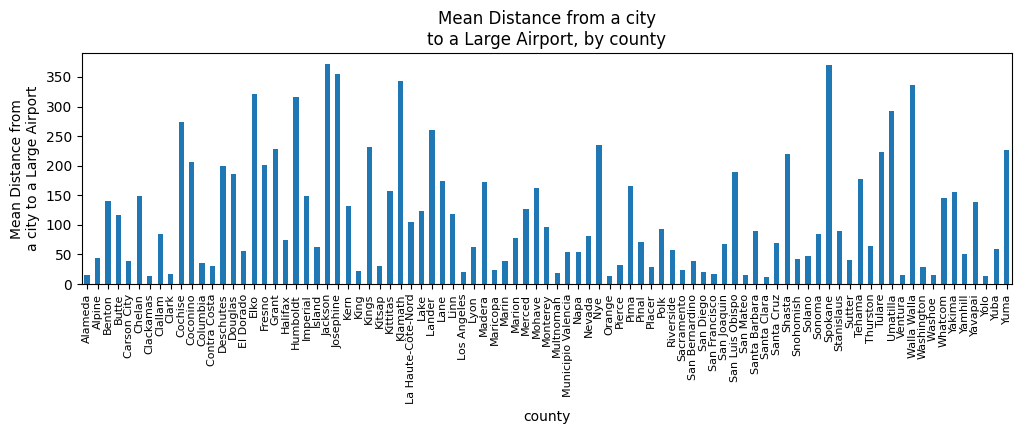

In [17]:
# To Large airport
mean_dist2_L_airport_by_county.plot(x='county', y='dist2_large_airport', kind='bar', figsize=(12,3))
plt.title('Mean Distance from a city\nto a Large Airport, by county')
plt.xlabel('county')
plt.ylabel('Mean Distance from\na city to a Large Airport')
plt.tick_params(axis='x', which='major', labelsize=8)
plt.show()
#plt.savefig('/content/drive/MyDrive/Colab Notebooks/M148 Datasets/M148 Plots/Mean Distance from a city to a Large Airport, by county.png')

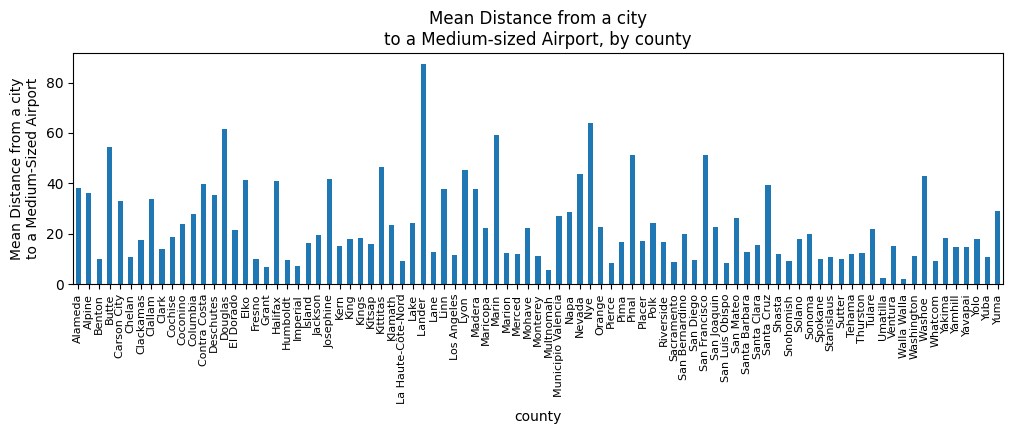

In [18]:
# To Medium airport
mean_dist2_M_airport_by_county.plot(x='county', y='dist2_medium_airport', kind='bar', figsize = (12, 3))
plt.title('Mean Distance from a city\nto a Medium-sized Airport, by county')
plt.xlabel('county')
plt.ylabel('Mean Distance from a city\nto a Medium-Sized Airport')
plt.tick_params(axis='x', which='major', labelsize=8)
plt.show()
#plt.savefig('/content/drive/MyDrive/Colab Notebooks/M148 Datasets/M148 Plots/Mean Distance from a city to a Medium-sized Airport.png')

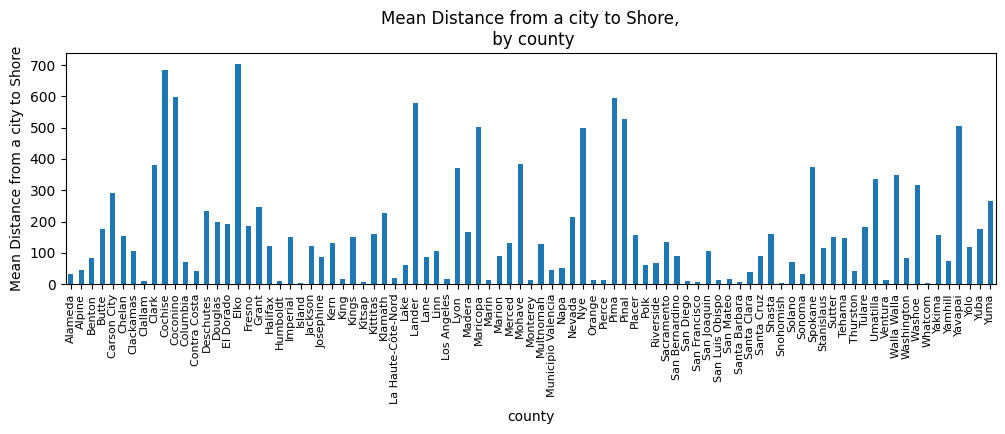

In [19]:
# To a Shore (Note that the longer the distance, the further from the shore)
mean_dist2_shore_by_county.plot(x='county', y='dist_to_shore', kind='bar', figsize=(12,3))
plt.title('Mean Distance from a city to Shore,\n by county')
plt.xlabel('county')
plt.ylabel('Mean Distance from a city to Shore')
plt.tick_params(axis='x', which='major', labelsize=8)
plt.show()
#plt.savefig('/content/drive/MyDrive/Colab Notebooks/M148 Datasets/M148 Plots/Mean Distance from a city to Shore, by county.png')

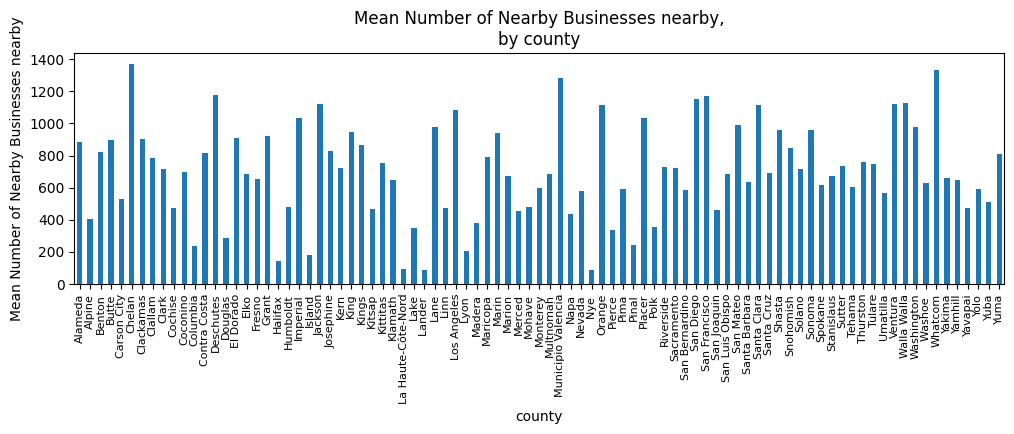

In [20]:
mean_num_business_by_county.plot(x='county', y='number_of_business', kind='bar', figsize=(12,3))
plt.title('Mean Number of Nearby Businesses nearby,\nby county')
plt.xlabel('county')
plt.ylabel('Mean Number of Nearby Businesses nearby')
plt.tick_params(axis='x', which='major', labelsize=8)
plt.show()
#plt.savefig('/content/drive/MyDrive/Colab Notebooks/M148 Datasets/M148 Plots/Mean Number of Nearby Businesses nearby, by county.png')

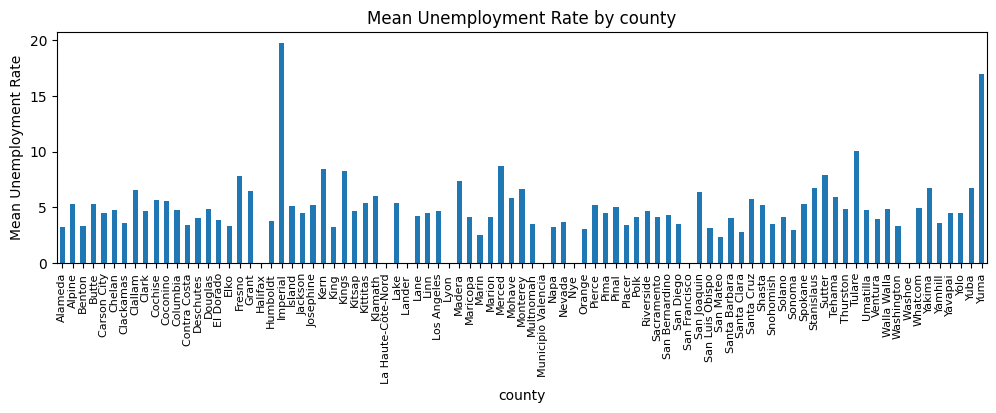

In [21]:
# 3. unemployment rates
mean_unemp_by_county.plot(x='county', y='Mean_Unemployment_Rate', kind='bar', figsize=(12,3))
plt.title('Mean Unemployment Rate by county')
plt.xlabel('county')
plt.ylabel('Mean Unemployment Rate')
plt.tick_params(axis='x', which='major', labelsize=8)
plt.show()

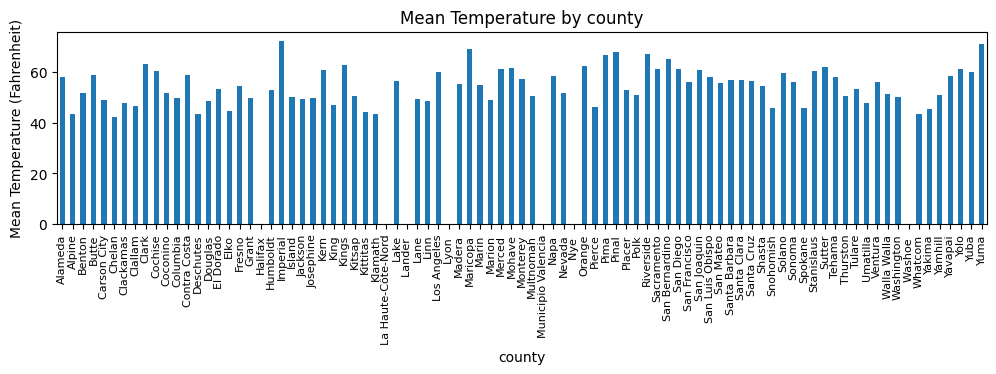

In [22]:
# 4. temperature
mean_temp_by_county.plot(x='county', y='avg_temp', kind='bar', figsize=(12,2.5))
plt.title('Mean Temperature by county')
plt.xlabel('county')
plt.ylabel('Mean Temperature (Fahrenheit)')
plt.tick_params(axis='x', which='major', labelsize=8)
plt.show()
#plt.savefig('/content/drive/MyDrive/Colab Notebooks/M148 Datasets/M148 Plots/Mean Temperature by county.png')

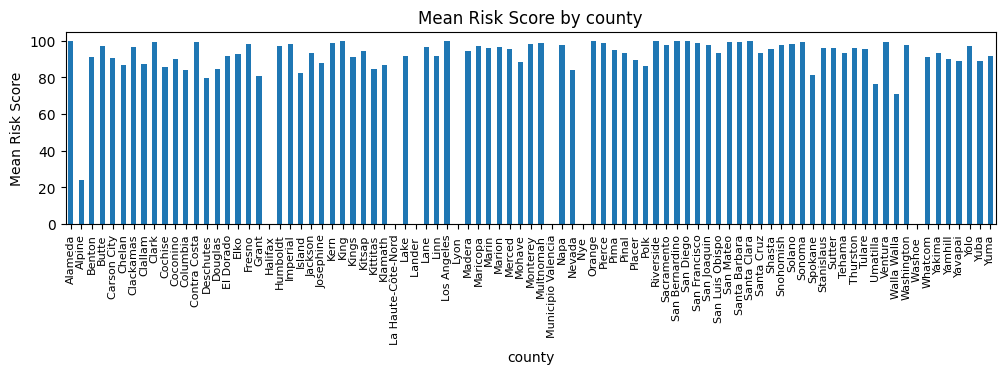

In [23]:
# 5. risk for natural disasters
mean_rs_by_county.plot(x='county', y='risk_score', kind='bar', figsize=(12,2.5))
plt.title('Mean Risk Score by county')
plt.xlabel('county')
plt.ylabel('Mean Risk Score')
plt.tick_params(axis='x', which='major', labelsize=8)
plt.show()
#plt.savefig('/content/drive/MyDrive/Colab Notebooks/M148 Datasets/M148 Plots/Mean Risk Score by county.png')

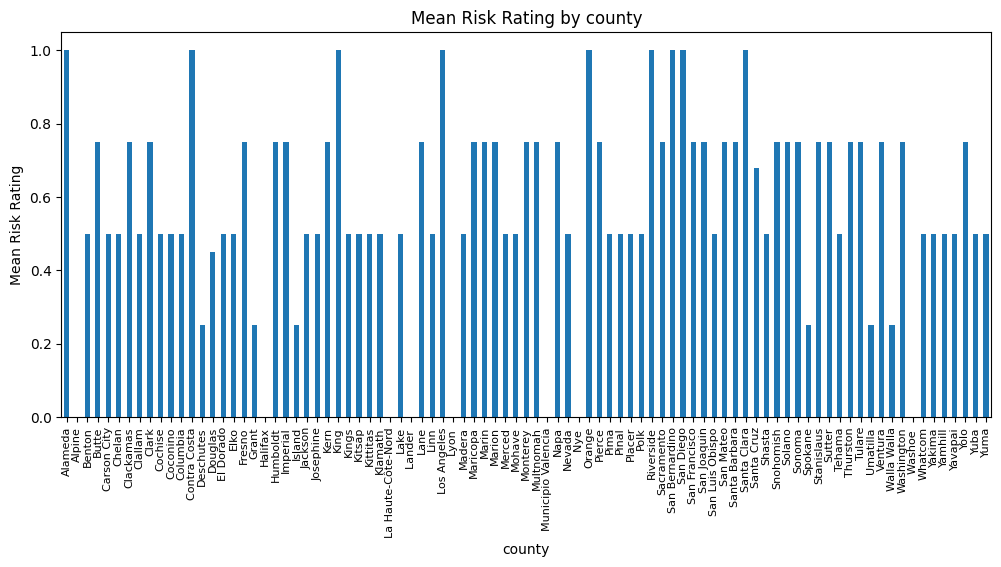

In [24]:
# average risk_rating of a county
mean_rr_by_county.plot(x='county', y='risk_rating', kind='bar', figsize=(12,5))
plt.title('Mean Risk Rating by county')
plt.xlabel('county')
plt.ylabel('Mean Risk Rating')
plt.tick_params(axis='x', which='major', labelsize=8)
plt.show()
#plt.savefig('/content/drive/MyDrive/Colab Notebooks/M148 Datasets/M148 Plots/Mean Risk Rating by county.png')

## Distribution of Apartment Prices by County vs. Overall

In [25]:
price = data[['county', 'price']]
mean_price_by_county = price.groupby('county').mean()

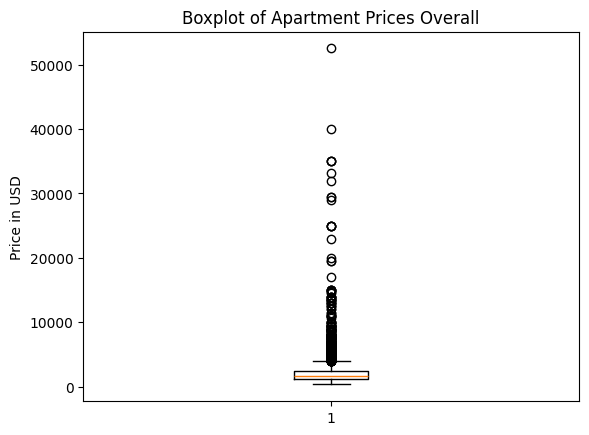

In [26]:
plt.boxplot(price.price)
plt.title('Boxplot of Apartment Prices Overall')
plt.ylabel('Price in USD')
plt.show()

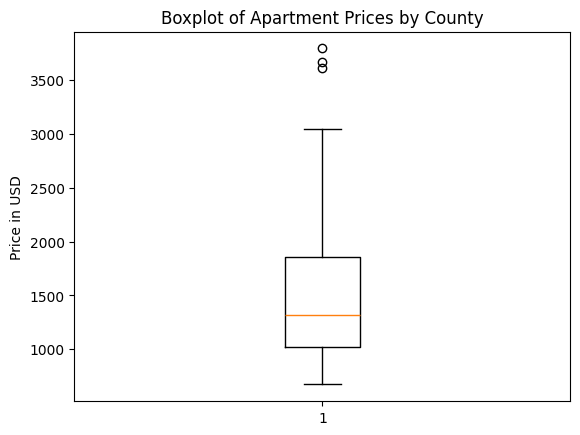

In [27]:
plt.boxplot(mean_price_by_county)
plt.title('Boxplot of Apartment Prices by County')
plt.ylabel('Price in USD')
plt.show()

89 Counties, with an average of $1553 per county

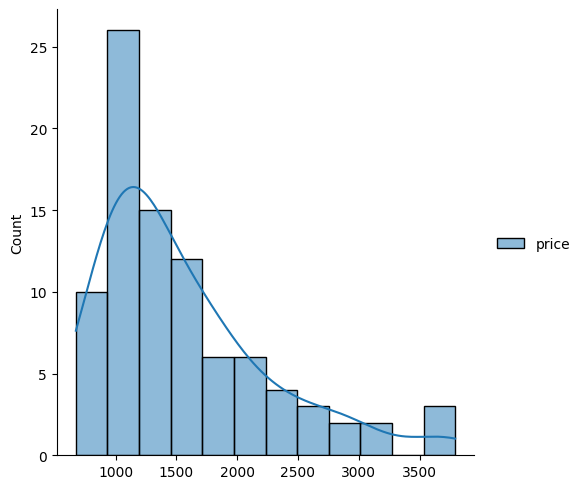

In [28]:
sns.displot(mean_price_by_county, kde = True, bins = 12, aspect = 1)

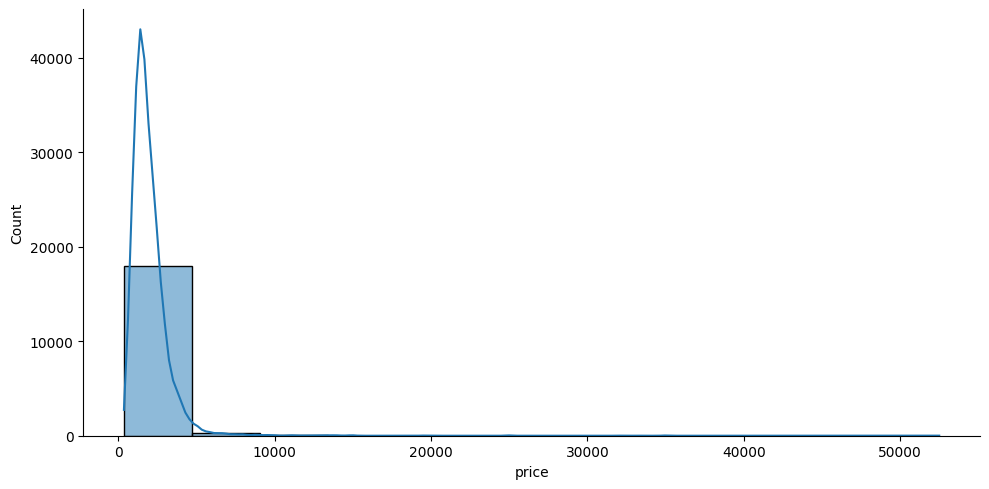

In [29]:
sns.displot(data['price'], kde = True, bins = 12, aspect = 2)

# Handling Missing Values

In [30]:
# Check for missing values
missing_values = data.drop(data.columns[[0, 1]], axis=1).isnull().sum()

# Calculate the percentage of missing values
missing_percentage = (missing_values / len(data)) * 100

# Combine missing values and their percentages into a new DataFrame
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Percentage': missing_percentage
})

# Format the table using tabulate for better visualization
formatted_missing_info = tabulate(missing_info, headers='keys', tablefmt='fancy_grid', showindex=True)

# Print the formatted table
print(formatted_missing_info)

╒══════════════════════════════╤══════════════════╤══════════════════════╕
│                              │   Missing Values │   Missing Percentage │
╞══════════════════════════════╪══════════════════╪══════════════════════╡
│ bathrooms                    │                6 │            0.0326762 │
├──────────────────────────────┼──────────────────┼──────────────────────┤
│ bedrooms                     │               62 │            0.337654  │
├──────────────────────────────┼──────────────────┼──────────────────────┤
│ has_photo                    │                0 │            0         │
├──────────────────────────────┼──────────────────┼──────────────────────┤
│ price                        │                0 │            0         │
├──────────────────────────────┼──────────────────┼──────────────────────┤
│ square_feet                  │                0 │            0         │
├──────────────────────────────┼──────────────────┼──────────────────────┤
│ cityname               

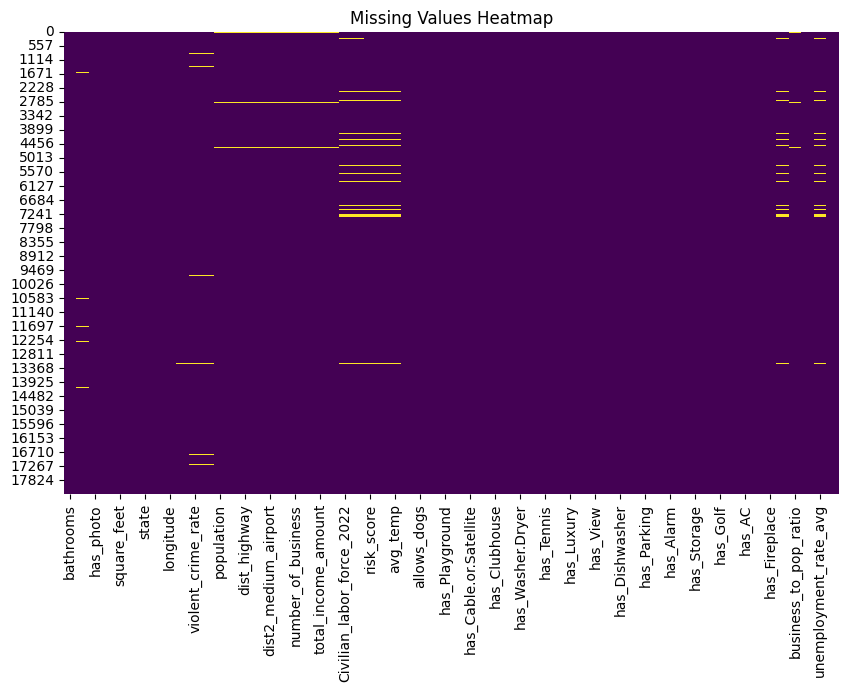

In [31]:
# Visualize missing values with a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.drop(data.columns[[0, 1]], axis=1).isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [32]:
# Remove missing values
data_cleaned = data.dropna(how='any')
#data_cleaned.to_csv("/content/drive/MyDrive/M148 Project/Datasets/Filtered for our 5 states/no_nas_master_dataset.csv", index=False)

In [33]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17338 entries, 0 to 18361
Data columns (total 64 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            17338 non-null  int64  
 1   category                      17338 non-null  object 
 2   bathrooms                     17338 non-null  float64
 3   bedrooms                      17338 non-null  float64
 4   has_photo                     17338 non-null  int64  
 5   price                         17338 non-null  int64  
 6   square_feet                   17338 non-null  int64  
 7   cityname                      17338 non-null  object 
 8   state                         17338 non-null  object 
 9   latitude                      17338 non-null  float64
 10  longitude                     17338 non-null  float64
 11  county                        17338 non-null  object 
 12  violent_crime_rate            17338 non-null  float64
 13  proper

# Cluster Analysis

In [34]:
!pip install scikit-learn-extra
!pip install pyclustering
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn_extra.cluster import KMedoids
from pyclustering.cluster.kmedians import kmedians
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [35]:
# Load the master dataset
df = pd.read_csv("/content/drive/MyDrive/M148 Project/Datasets/Filtered for our 5 states/no_nas_master_dataset.csv")
df = df.drop(df.columns[0], axis=1)

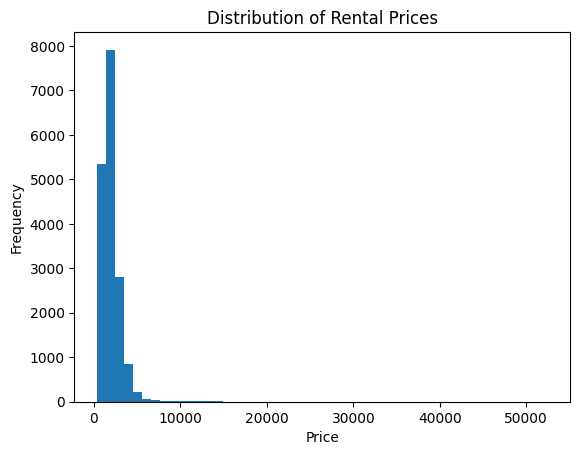

In [36]:
# Plot a histogram of price
plt.hist(df['price'], bins=50)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Rental Prices')
plt.show()

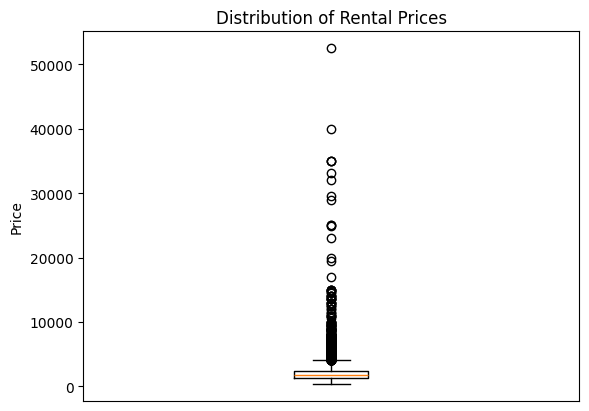

In [37]:
# Construct a boxplot of price as well
plt.boxplot(df['price'])
plt.ylabel('Price')
plt.title('Distribution of Rental Prices')
plt.xticks([])
plt.show()

In [38]:
print("Minimum:", f"${np.quantile(df['price'], 0):.2f}",
      "\nFirst Quartile (Q1):", f"${np.quantile(df['price'], 0.25):.2f}",
      "\nMedian (Q2):", f"${np.quantile(df['price'], 0.5):.2f}",
      "\nThird Quartile (Q3):", f"${np.quantile(df['price'], 0.75):.2f}",
      "\nMaximum:", f"${np.quantile(df['price'], 1):.2f}")

Minimum: $350.00 
First Quartile (Q1): $1288.25 
Median (Q2): $1750.00 
Third Quartile (Q3): $2395.00 
Maximum: $52500.00


## Outlier Detection in Pricing

In [39]:
# Calculate the interquartile range (IQR)
Q1 = 1288.25
Q3 = 2395.0
IQR = Q3 - Q1

# Define the upper bound
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Identify outliers
outliers = df['price'][df['price'] > upper_bound]

In [40]:
print(f"Number of outliers (i.e., prices greater than ${upper_bound:.2f}): {len(outliers)}")

Number of outliers (i.e., prices greater than $4055.12): 653


In [41]:
print("Minimum:", f"${np.quantile(outliers, 0):.2f}",
      "\nFirst Quartile (Q1):", f"${np.quantile(outliers, 0.25):.2f}",
      "\nMedian (Q2):", f"${np.quantile(outliers, 0.5):.2f}",
      "\nThird Quartile (Q3):", f"${np.quantile(outliers, 0.75):.2f}",
      "\nMaximum:", f"${np.quantile(outliers, 1):.2f}")

Minimum: $4060.00 
First Quartile (Q1): $4395.00 
Median (Q2): $4909.00 
Third Quartile (Q3): $6195.00 
Maximum: $52500.00


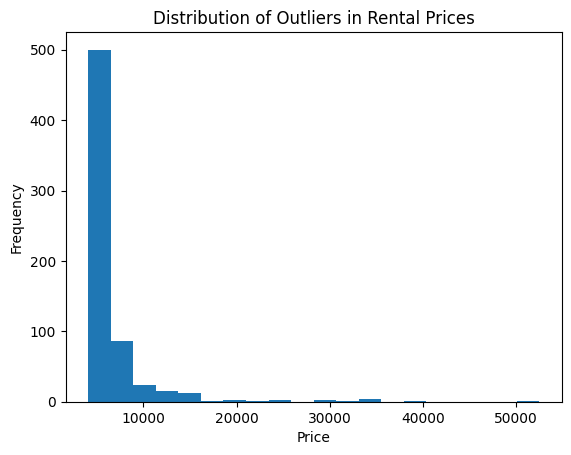

In [42]:
# Plot a histogram of price outliers
plt.hist(outliers, bins=20)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Outliers in Rental Prices')
plt.show()

## Price Clustering (Original Work)

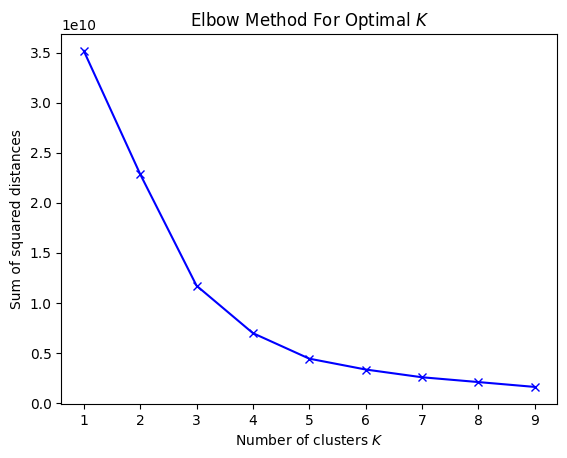

In [43]:
# Search for "optimal" number of clusters
SS_dist = []
K = range(1,10)
for num_clusters in K :
  kmeans = KMeans(n_clusters=num_clusters, random_state=0)
  kmeans.fit(df[['price']])
  SS_dist.append(kmeans.inertia_)
plt.plot(K,SS_dist,'bx-')
plt.xlabel('Number of clusters $K$')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal $K$')
plt.show()

In [44]:
def clustering_performance(method_name, implementation):
  print(f"Silhouette Score for {method_name}:", silhouette_score(df[['price']], implementation.labels_),
        f"\nDavies-Bouldin Score for {method_name}:", davies_bouldin_score(df[['price']], implementation.labels_), "\n")

# Sklearn implementation of K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(df[['price']])

# Sklearn implementation of Agglomerative Clustering
agg_clust = AgglomerativeClustering(n_clusters=6, linkage='ward').fit(df[['price']])

# Sklearn implementation of DBSCAN
db = DBSCAN(eps=199, min_samples=10).fit(df[['price']])

# Sklearn implementation of K-Medoids Clustering
kmedoids = KMedoids(n_clusters=3, init='k-medoids++', random_state=0).fit(df[['price']])

clustering_performance("K-Means Clustering", kmeans)
clustering_performance("Agglomerative Clustering", agg_clust)
clustering_performance("DBSCAN", db)
clustering_performance("K-Medoids Clustering", kmedoids)

Silhouette Score for K-Means Clustering: 0.6302480893661735 
Davies-Bouldin Score for K-Means Clustering: 0.5080676120149943 

Silhouette Score for Agglomerative Clustering: 0.5601080517138073 
Davies-Bouldin Score for Agglomerative Clustering: 0.5044996569559134 

Silhouette Score for DBSCAN: 0.7736423173723393 
Davies-Bouldin Score for DBSCAN: 0.7787962036469223 

Silhouette Score for K-Medoids Clustering: 0.5557360387979156 
Davies-Bouldin Score for K-Medoids Clustering: 0.5324077032553309 



In [45]:
# Perform k-medians clustering
np.random.seed(0) # (for reproducibility)
initial_medians = df[['price']].iloc[np.random.permutation(df[['price']].shape[0])[:3],:].values.tolist()
kmedians_instance = kmedians(df[['price']], initial_medians)
kmedians_instance.process()
clusters = kmedians_instance.get_clusters()

# Assign cluster labels
labels = np.zeros(df[['price']].shape[0], dtype=int)
for cluster_index, cluster_points in enumerate(clusters):
  for point_index in cluster_points:
    labels[point_index] = cluster_index

# Evaluate performance metrics
print("Silhouette Score for K-Medians Clustering:", silhouette_score(df[['price']], labels),
      "\nDavies-Bouldin Score for K-Medians Clustering:", davies_bouldin_score(df[['price']], labels))

Silhouette Score for K-Medians Clustering: 0.4899163095757594 
Davies-Bouldin Score for K-Medians Clustering: 0.6801098892327668


In [46]:
# Perform Density-Based Spatial Clustering of Applications with Noise (DBSCAN)
db = DBSCAN(eps=199, min_samples=10).fit(df[['price']])
Partition_vec = db.labels_

In [47]:
set(db.labels_)

{-1, 0, 1, 2, 3, 4}

In [48]:
# Count the number of noise points (labeled as -1)
list(db.labels_).count(-1)

67

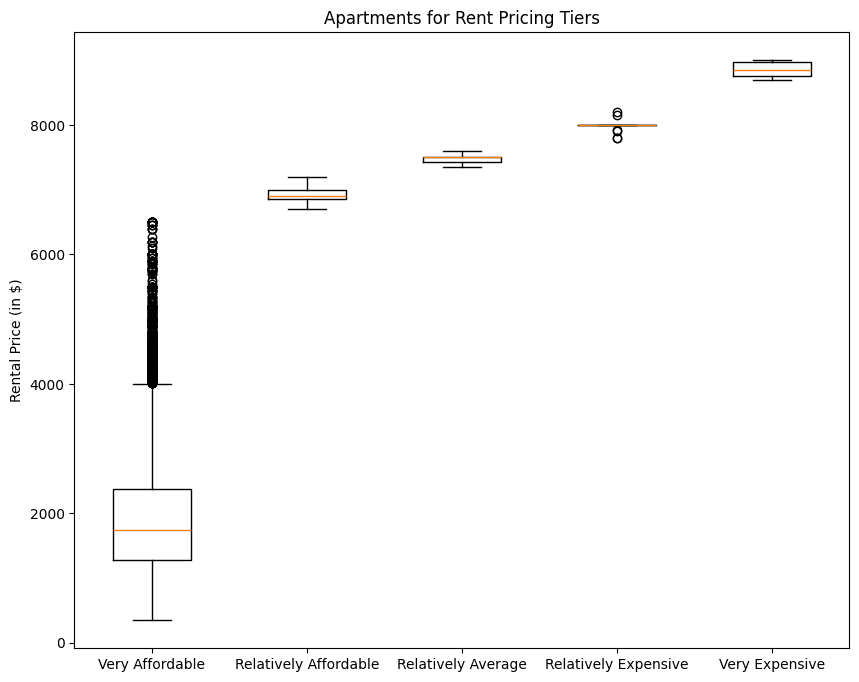

In [49]:
# Exclude noise points
prices = df['price'].iloc[db.labels_ != -1]
Partition_vec = Partition_vec[db.labels_ != -1]

# Reassign the labels to represent ordered pricing tiers
centroids = []
for cluster_label in range(5):
  cluster_prices = prices.loc[Partition_vec == cluster_label]
  centroids.append(cluster_prices.mean())
ordered_labels = np.zeros(len(Partition_vec), dtype=int)
for index, label in enumerate(np.argsort(centroids)):
  ordered_labels[Partition_vec == label] = index

# Plot side-by-side boxplots
plt.figure(figsize=(10, 8))
plt.boxplot([prices.loc[ordered_labels == cluster_label] for cluster_label in range(5)])
plt.xticks([1, 2, 3, 4, 5], ['Very Affordable', 'Relatively Affordable', 'Relatively Average',
                             'Relatively Expensive', 'Very Expensive'])
plt.ylabel('Rental Price (in $)')
plt.title('Apartments for Rent Pricing Tiers')
plt.show()

In [50]:
for tier_label in range(5):
  cluster_prices = prices.loc[ordered_labels == tier_label]
  print(f"Tier {tier_label + 1} ({['Very Affordable', 'Relatively Affordable', 'Relatively Average', 'Relatively Expensive', 'Very Expensive'][tier_label]}):")
  print(cluster_prices.describe().to_string(), "\n")

Tier 1 (Very Affordable):
count   17203.0000
mean     1922.3887
std       911.5311
min       350.0000
25%      1284.0000
50%      1742.0000
75%      2375.0000
max      6500.0000 

Tier 2 (Relatively Affordable):
count     25.0000
mean    6910.5200
std      113.3803
min     6700.0000
25%     6850.0000
50%     6900.0000
75%     6999.0000
max     7200.0000 

Tier 3 (Relatively Average):
count     14.0000
mean    7479.7143
std       75.7399
min     7356.0000
25%     7425.0000
50%     7500.0000
75%     7500.0000
max     7600.0000 

Tier 4 (Relatively Expensive):
count     17.0000
mean    7984.6471
std       99.0719
min     7795.0000
25%     7995.0000
50%     7995.0000
75%     8000.0000
max     8200.0000 

Tier 5 (Very Expensive):
count     12.0000
mean    8852.4167
std      119.2175
min     8700.0000
25%     8750.0000
50%     8850.0000
75%     8972.5000
max     9000.0000 



In [51]:
# Perform k-means clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(df[['price']])
Partition_vec = kmeans.labels_

# Reassign the labels to represent ordered pricing tiers
centroids = []
for cluster_label in range(3):
  cluster_prices = df['price'].loc[Partition_vec == cluster_label]
  centroids.append(cluster_prices.mean())
ordered_labels = np.zeros(len(Partition_vec), dtype=int)
for index, label in enumerate(np.argsort(centroids)):
  ordered_labels[Partition_vec == label] = index

In [52]:
for tier_label in range(3):
  cluster_prices = df['price'].loc[ordered_labels == tier_label]
  print(f"Tier {tier_label + 1} ({['Affordable', 'Mid-Range', 'Expensive'][tier_label]}):")
  print(cluster_prices.describe().to_string(), "\n")

Tier 1 (Affordable):
count   14099.0000
mean     1590.2638
std       523.1196
min       350.0000
25%      1196.0000
50%      1560.0000
75%      1995.0000
max      2625.0000 

Tier 2 (Mid-Range):
count    3224.0000
mean     3655.5288
std      1455.2967
min      2626.0000
25%      2876.0000
50%      3209.5000
75%      3886.5000
max     17000.0000 

Tier 3 (Expensive):
count      15.0000
mean    30571.0000
std      8564.4056
min     19500.0000
25%     24950.0000
50%     29500.0000
75%     35000.0000
max     52500.0000 



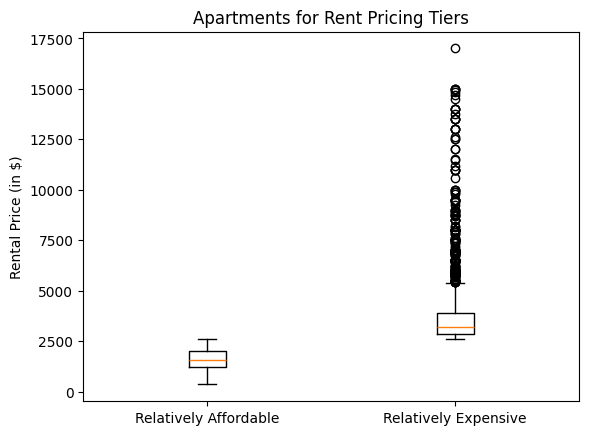

In [53]:
# Plot side-by-side boxplots
plt.boxplot([df['price'].loc[ordered_labels == cluster_label] for cluster_label in range(2)])
plt.xticks([1, 2], ['Relatively Affordable', 'Relatively Expensive'])
plt.ylabel('Rental Price (in $)')
plt.title('Apartments for Rent Pricing Tiers')
plt.show()

In [54]:
df['pricing_tier'] = ordered_labels

In [55]:
# Group by county and calculate the count of each pricing tier
tier_by_county = df.groupby(['county', 'pricing_tier']).size().unstack(fill_value=0)
tier_by_county.columns = ['Tier 1 (Affordable)', 'Tier 2 (Mid-Range)', 'Tier 3 (Expensive)']

# Calculate the proportion of each pricing tier in each county
tier_by_county_proportion = tier_by_county.div(tier_by_county.sum(axis=1), axis=0)

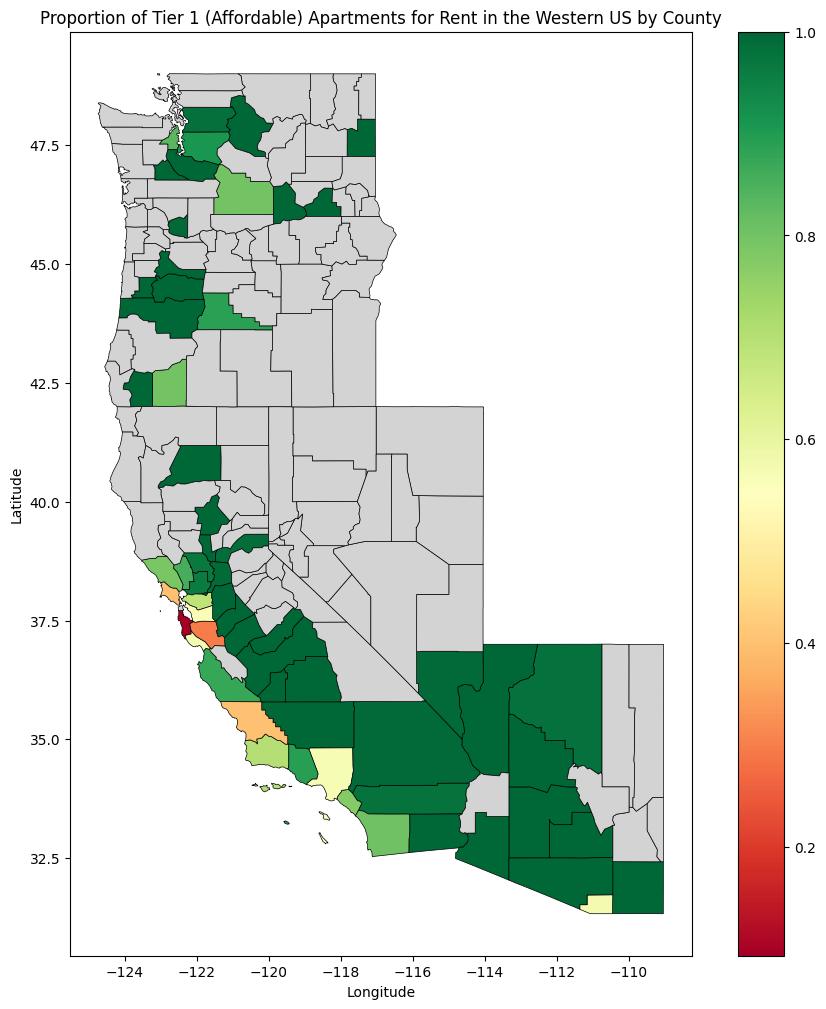

In [56]:
# Plot a choropleth map to visualize pricing tier by location
import geopandas as gpd
states = gpd.read_file('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json')
western_states_fips = ['06', '41', '53', '04', '32'] # (FIPS codes for CA, OR, WA, AZ, NV are 06, 41, 53, 04, 32 respectively)
west = states[states['STATE'].isin(western_states_fips)]
merged = west.merge(tier_by_county_proportion, left_on='NAME', right_on='county', how='left')
merged.plot(column='Tier 1 (Affordable)', legend=True, cmap='RdYlGn', edgecolor='black', linewidth=0.5,
            figsize=(12, 12), missing_kwds={"color": "lightgray", "edgecolor": "black", "linewidth": 0.5})
plt.title('Proportion of Tier 1 (Affordable) Apartments for Rent in the Western US by County')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

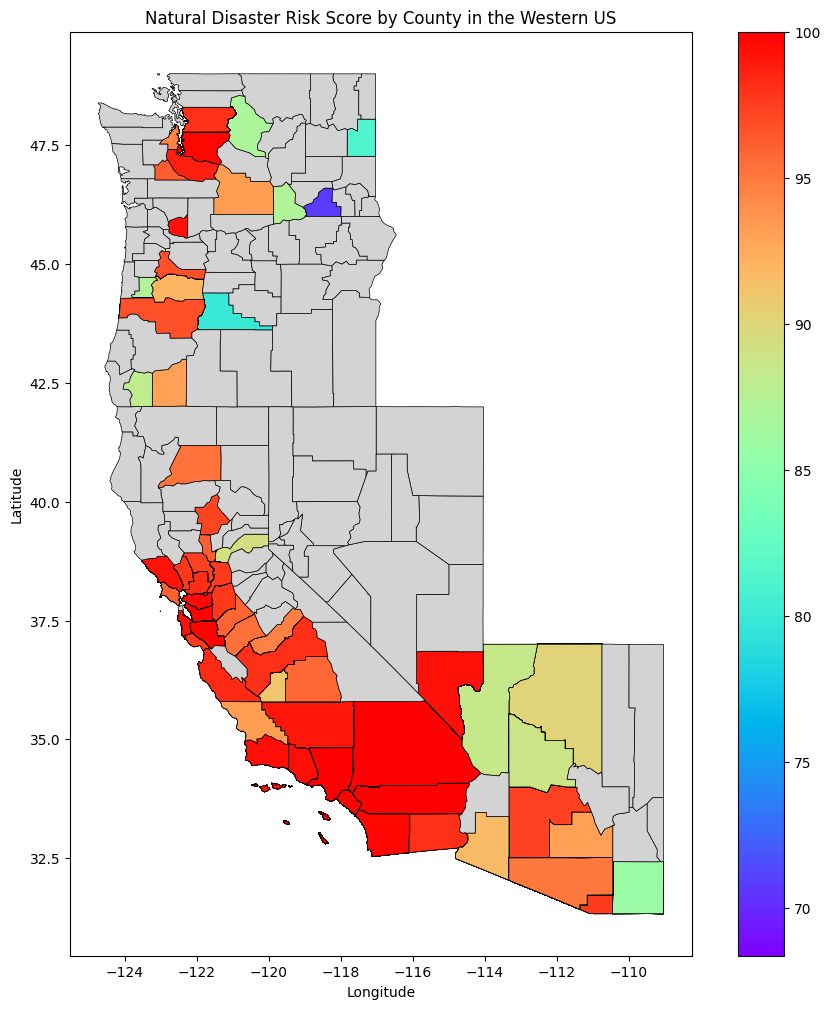

In [57]:
# Plot a choropleth map to visualize natural disaster risk by location
merged = west.merge(df[['county', 'risk_score']], left_on='NAME', right_on='county', how='left')
merged.plot(column='risk_score', legend=True, cmap='rainbow', edgecolor='black', linewidth=0.5,
            figsize=(12, 12), missing_kwds={"color": "lightgray", "edgecolor": "black", "linewidth": 0.5})
plt.title('Natural Disaster Risk Score by County in the Western US')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [58]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [59]:
# Perform an ANOVA test to determine if there's a significant difference in natural disaster risk across the pricing tiers
anova_result = stats.f_oneway(df[df['pricing_tier'] == 0]['risk_score'].dropna(),
                              df[df['pricing_tier'] == 1]['risk_score'].dropna(),
                              df[df['pricing_tier'] == 2]['risk_score'].dropna())
print(f'ANOVA p-value: {anova_result.pvalue}')

ANOVA p-value: 5.556358526884284e-163


In [60]:
# Apply Tukey's HSD test to check pairwise differences between pricing tiers
features = df[['pricing_tier', 'risk_score']].dropna()
print(pairwise_tukeyhsd(endog=features['risk_score'], groups=features['pricing_tier'],
                        alpha=0.05))

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     0      1   1.0393    0.0 0.9509 1.1277   True
     0      2   1.1911 0.0448 0.0214 2.3609   True
     1      2   0.1518 0.9504  -1.02 1.3236  False
--------------------------------------------------


 There is a statistically significant difference in the `risk_score` between pricing tier 1 (affordable) and tier 2 (mid-range). This suggests that the risk of natural disasters may influence rental prices for apartments in western US states, particularly in terms of their affordability relative to pricing tiers.

## Price Clustering with Data Standardization

In [61]:
# Standardize the prices
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df[['price']])
df['price_standardized'] = scaler.transform(df[['price']])

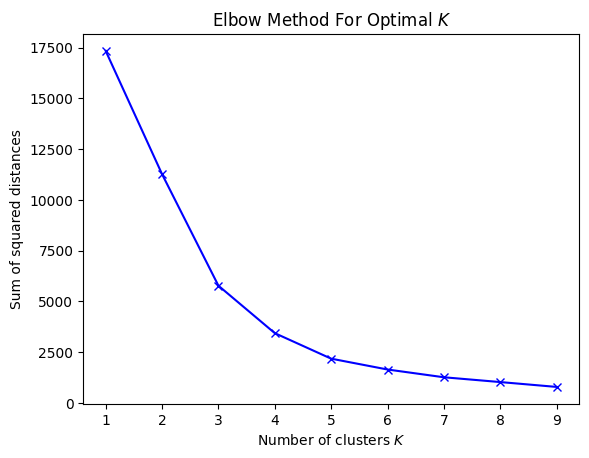

In [62]:
# Search for "optimal" number of clusters
SS_dist = []
K = range(1,10)
for num_clusters in K :
  kmeans = KMeans(n_clusters=num_clusters, random_state=0)
  kmeans.fit(df[['price_standardized']])
  SS_dist.append(kmeans.inertia_)
plt.plot(K,SS_dist,'bx-')
plt.xlabel('Number of clusters $K$')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal $K$')
plt.show()

In [63]:
def clustering_performance(method_name, implementation):
  print(f"Silhouette Score for {method_name}:", silhouette_score(df[['price_standardized']], implementation.labels_),
        f"\nDavies-Bouldin Score for {method_name}:", davies_bouldin_score(df[['price_standardized']], implementation.labels_), "\n")

# Sklearn implementation of K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(df[['price_standardized']])

# Sklearn implementation of Agglomerative Clustering
agg_clust = AgglomerativeClustering(n_clusters=6, linkage='ward').fit(df[['price_standardized']])

# Sklearn implementation of DBSCAN
db = DBSCAN(eps=0.6, min_samples=10).fit(df[['price_standardized']])

# Sklearn implementation of K-Medoids Clustering
kmedoids = KMedoids(n_clusters=3, init='k-medoids++', random_state=0).fit(df[['price_standardized']])

clustering_performance("K-Means Clustering", kmeans)
clustering_performance("Agglomerative Clustering", agg_clust)
clustering_performance("DBSCAN", db)
clustering_performance("K-Medoids Clustering", kmedoids)

Silhouette Score for K-Means Clustering: 0.6302480893661736 
Davies-Bouldin Score for K-Means Clustering: 0.5080676120149952 

Silhouette Score for Agglomerative Clustering: 0.5659624695628495 
Davies-Bouldin Score for Agglomerative Clustering: 0.49736593692741327 

Silhouette Score for DBSCAN: 0.9060431908014919 
Davies-Bouldin Score for DBSCAN: 0.4064381046256957 

Silhouette Score for K-Medoids Clustering: 0.5557360387979151 
Davies-Bouldin Score for K-Medoids Clustering: 0.532407703255333 



In [64]:
# Perform k-medians clustering
np.random.seed(0) # (for reproducibility)
initial_medians = df[['price_standardized']].iloc[np.random.permutation(df[['price_standardized']].shape[0])[:3],:].values.tolist()
kmedians_instance = kmedians(df[['price_standardized']], initial_medians)
kmedians_instance.process()
clusters = kmedians_instance.get_clusters()

# Assign cluster labels
labels = np.zeros(df[['price_standardized']].shape[0], dtype=int)
for cluster_index, cluster_points in enumerate(clusters):
  for point_index in cluster_points:
    labels[point_index] = cluster_index

# Evaluate performance metrics
print("Silhouette Score for K-Medians Clustering:", silhouette_score(df[['price_standardized']], labels),
      "\nDavies-Bouldin Score for K-Medians Clustering:", davies_bouldin_score(df[['price_standardized']], labels))

Silhouette Score for K-Medians Clustering: 0.4637464936130376 
Davies-Bouldin Score for K-Medians Clustering: 0.6778997653858663


In [65]:
# Perform k-means clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(df[['price_standardized']])
Partition_vec = kmeans.labels_

# Reassign the labels to represent ordered pricing tiers
centroids = []
for cluster_label in range(3):
  cluster_prices = df['price_standardized'].loc[Partition_vec == cluster_label]
  centroids.append(cluster_prices.mean())
ordered_labels = np.zeros(len(Partition_vec), dtype=int)
for index, label in enumerate(np.argsort(centroids)):
  ordered_labels[Partition_vec == label] = index

In [66]:
for tier_label in range(3):
  cluster_prices = df['price_standardized'].loc[ordered_labels == tier_label]
  print(f"Tier {tier_label + 1} ({['Affordable', 'Mid-Range', 'Expensive'][tier_label]}):")
  print(cluster_prices.describe().to_string(), "\n")

Tier 1 (Affordable):
count   14099.0000
mean       -0.2873
std         0.3674
min        -1.1583
25%        -0.5642
50%        -0.3085
75%        -0.0031
max         0.4393 

Tier 2 (Mid-Range):
count   3224.0000
mean       1.1630
std        1.0220
min        0.4400
25%        0.6156
50%        0.8498
75%        1.3252
max       10.5340 

Tier 3 (Expensive):
count   15.0000
mean    20.0641
std      6.0142
min     12.2896
25%     16.1168
50%     19.3120
75%     23.1743
max     35.4634 



In [67]:
# Perform Density-Based Spatial Clustering of Applications with Noise (DBSCAN)
db = DBSCAN(eps=0.6, min_samples=10).fit(df[['price_standardized']])
Partition_vec = db.labels_

In [68]:
set(db.labels_)

{-1, 0, 1}

In [69]:
# Count the number of noise points (labeled as -1)
list(db.labels_).count(-1)

16

In [70]:
# Exclude noise points
prices = df['price_standardized'].iloc[db.labels_ != -1]
Partition_vec = Partition_vec[db.labels_ != -1]

In [71]:
for tier_label in range(2):
  cluster_prices = prices.loc[Partition_vec == tier_label]
  print(f"{['Tier 1 (Affordable)', 'Tier 2 (Expensive)'][tier_label]}:")
  print(cluster_prices.describe().to_string(), "\n")

Tier 1 (Affordable):
count   17299.0000
mean       -0.0290
std         0.7246
min        -1.1583
25%        -0.5017
50%        -0.1758
75%         0.2743
max         7.0228 

Tier 2 (Expensive):
count   23.0000
mean     8.2849
std      0.5981
min      7.3739
25%      7.7250
50%      8.2517
75%      8.8486
max      9.1295 



The clustering results for standardized prices are overall very similar compared to raw prices (i.e., my original work), except for DBSCAN. Specifically, DBSCAN performs better with a higher silhouette score and a lower Davies-Bouldin score, but its resulting pricing tiers are even more imbalanced.

## Price Clustering with Data Normalization by State

In [72]:
# Normalize the prices by state
df['price_normalized'] = (df['price'] - df.groupby('state')['price'].transform('mean')) / df.groupby('state')['price'].transform('std')

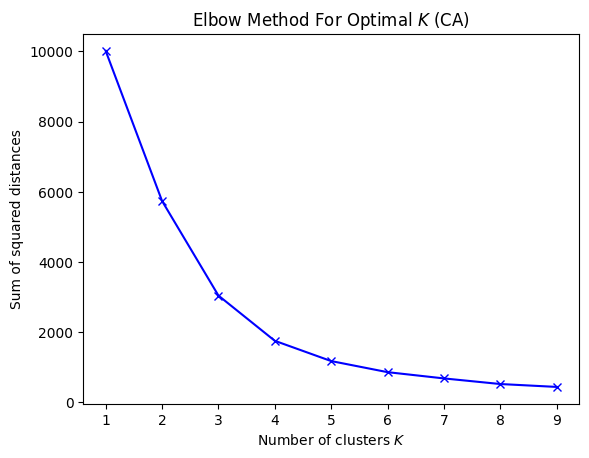

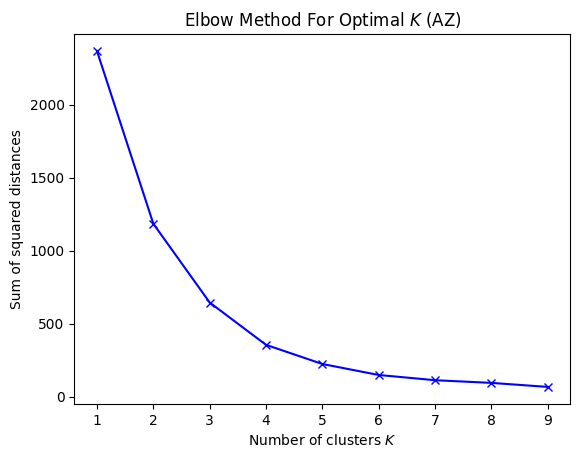

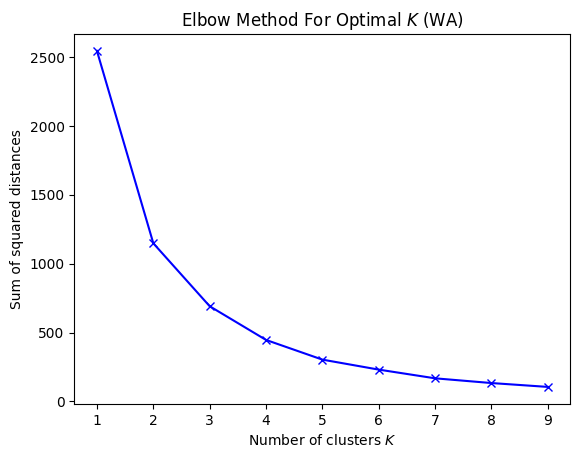

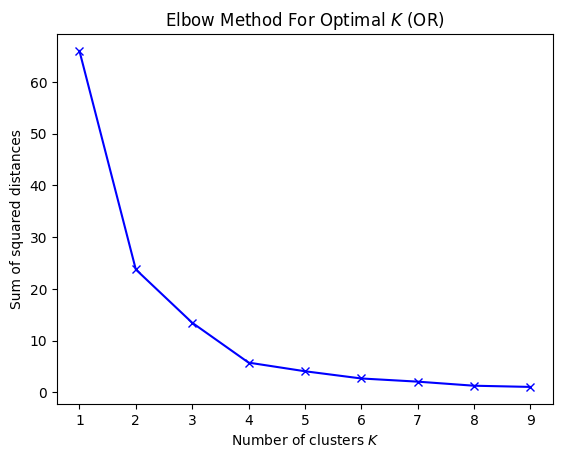

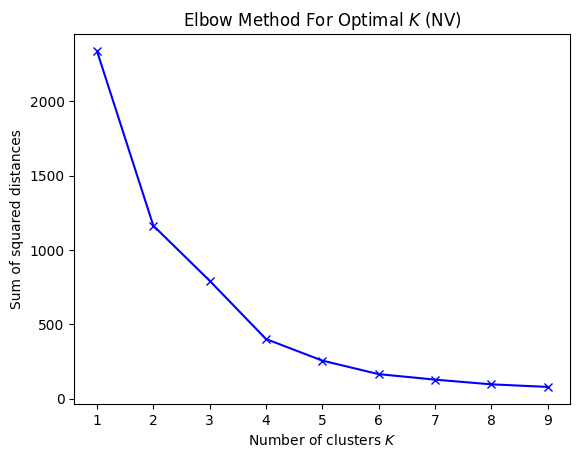

In [73]:
# Search for "optimal" number of clusters for each state's normalized prices
for state in df['state'].unique():
  state_df = df[df['state'] == state]
  SS_dist = []
  K = range(1,10)
  for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans.fit(state_df[['price_normalized']])
    SS_dist.append(kmeans.inertia_)
  plt.plot(K,SS_dist,'bx-')
  plt.xlabel('Number of clusters $K$')
  plt.ylabel('Sum of squared distances')
  plt.title(f"Elbow Method For Optimal $K$ ({state})")
  plt.show()

In [74]:
def kmeans_clustering_by_state(state, state_df, n_clusters):
  print(f"\n{state}:")
  kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(state_df[['price_normalized']])
  print(f"Silhouette Score for {n_clusters}-Means Clustering:", silhouette_score(state_df[['price_normalized']], kmeans.labels_),
        f"\nDavies-Bouldin Score for {n_clusters}-Means Clustering:", davies_bouldin_score(state_df[['price_normalized']], kmeans.labels_), "\n")
  Partition_vec = kmeans.labels_
  centroids = []
  for cluster_label in range(n_clusters):
    cluster_prices = state_df['price_normalized'].loc[Partition_vec == cluster_label]
    centroids.append(cluster_prices.mean())
  ordered_labels = np.zeros(len(Partition_vec), dtype=int)
  for index, label in enumerate(np.argsort(centroids)):
    ordered_labels[Partition_vec == label] = index
  print(f"\nPricing Tiers for {state}:\n")
  for tier_label in range(n_clusters):
    cluster_prices = state_df['price_normalized'].loc[ordered_labels == tier_label]
    if n_clusters == 2:
      print(f"Tier {tier_label + 1} ({['Relatively Affordable', 'Relatively Expensive'][tier_label]}):")
    elif n_clusters == 4:
      print(f"Tier {tier_label + 1} ({['Very Affordable', 'Relatively Affordable', 'Relatively Expensive', 'Very Expensive'][tier_label]}):")
    elif n_clusters == 5:
      print(f"Tier {tier_label + 1} ({['Very Affordable', 'Relatively Affordable', 'Relatively Average', 'Relatively Expensive', 'Very Expensive'][tier_label]}):")
    print(cluster_prices.describe().to_string(), "\n")

In [75]:
for state in ['CA', 'AZ', 'WA']:
  state_df = df[df['state'] == state]
  kmeans_clustering_by_state(state, state_df, 4)

oregon_df = df[df['state'] == 'OR']
kmeans_clustering_by_state("OR", oregon_df, 2)

nevada_df = df[df['state'] == 'NV']
kmeans_clustering_by_state("NV", nevada_df, 5)


CA:
Silhouette Score for 4-Means Clustering: 0.5981995080672012 
Davies-Bouldin Score for 4-Means Clustering: 0.5098599763929875 


Pricing Tiers for CA:

Tier 1 (Very Affordable):
count   7313.0000
mean      -0.3329
std        0.2815
min       -1.1744
25%       -0.5484
50%       -0.3316
75%       -0.0979
max        0.1644 

Tier 2 (Relatively Affordable):
count   2573.0000
mean       0.6592
std        0.4598
min        0.1650
25%        0.3094
50%        0.5221
75%        0.8755
max        2.4239 

Tier 3 (Relatively Expensive):
count   117.0000
mean      4.3311
std       1.7599
min       2.5438
25%       3.0230
50%       3.7532
75%       5.3891
max      10.5107 

Tier 4 (Very Expensive):
count   13.0000
mean    17.8402
std      4.7563
min     12.3078
25%     13.5059
50%     17.6990
75%     19.4961
max     29.9790 


AZ:
Silhouette Score for 4-Means Clustering: 0.5429535610945428 
Davies-Bouldin Score for 4-Means Clustering: 0.4530034080747788 


Pricing Tiers for AZ:

Tier 1 (Very A

K-means clustering performance for normalized prices by state is overall slightly worse compared to raw prices (i.e., my original work), so this clustering approach to identify pricing tiers will not be pursued further.

## Price Clustering Based on PCA-Reduced Features

In [76]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = df.drop(columns=['id', 'cityname', 'county', 'category', 'state', 'has_nan', 'number_of_returns',
                            'price', 'pricing_tier', 'price_standardized', 'price_normalized',
                            'dollar_per_sq_ft', 'square_feet'])
scaler.fit(features)
df_standardized = pd.DataFrame(scaler.transform(features), columns=features.columns, index=features.index)

# Apply PCA
from sklearn.decomposition import PCA
df_pca = PCA(n_components=2).fit_transform(df_standardized)

In [77]:
# Perform 3-means clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(df[['price']])
Partition_vec = kmeans.labels_

# Reassign the labels to represent ordered pricing tiers
centroids = []
for cluster_label in range(3):
  cluster_prices = df['price'].loc[Partition_vec == cluster_label]
  centroids.append(cluster_prices.mean())
ordered_labels = np.zeros(len(Partition_vec), dtype=int)
for index, label in enumerate(np.argsort(centroids)):
  ordered_labels[Partition_vec == label] = index

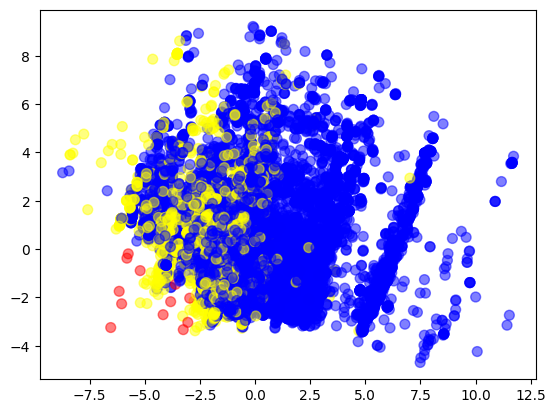

In [78]:
# Visualize the results on PCA-reduced data
colors = ['blue', 'yellow', 'red']
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=[colors[label] for label in ordered_labels], s=50, alpha=0.5);

In [79]:
sorted_indices = np.argsort(centroids)
cluster_centers = kmeans.cluster_centers_[sorted_indices]

for cluster_label in range(3):
  print(f"Pricing tier {cluster_label + 1} (in {colors[cluster_label]}) mean:",
        f"${cluster_centers[cluster_label][0]:.2f}")

Pricing tier 1 (in blue) mean: $1591.37
Pricing tier 2 (in yellow) mean: $3660.33
Pricing tier 3 (in red) mean: $30571.00


In the scatterplot above, the 15 most expensive apartments (colored in red) form a distinct cluster on the bottom left. Meanwhile, significant overlap exists between the other two clusters as pricing tier 1 (colored in blue) dominates the space, and pricing tier 2 (colored in yellow) is interspersed within it. This lack of separation suggests that mid-priced apartments share characteristics with lower-priced ones.

## Clustering on All Features for Market Segmentation

In [80]:
# Exclude categorical variables and price
select_features = df.drop(columns=['id', 'cityname', 'county', 'category', 'state', 'has_nan', 'number_of_returns',
                                   'price', 'pricing_tier', 'price_standardized', 'price_normalized',
                                   'dollar_per_sq_ft', 'square_feet'])
# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(select_features)
df_standardized = pd.DataFrame(scaler.transform(select_features), columns=select_features.columns, index=select_features.index)

In [81]:
print("List of features:\n", df_standardized.columns)

List of features:
 Index(['bathrooms', 'bedrooms', 'has_photo', 'latitude', 'longitude',
       'violent_crime_rate', 'property_crime_rate', 'population', 'density',
       'dist_highway', 'dist2_large_airport', 'dist2_medium_airport',
       'dist_to_shore', 'number_of_business', 'adjusted_gross_income',
       'total_income_amount', 'Civilian_labor_force_2022',
       'Median_Household_Income_2021', 'risk_score', 'risk_rating', 'avg_temp',
       'allows_cats', 'allows_dogs', 'has_Refrigerator', 'has_Playground',
       'has_Internet.Access', 'has_Cable.or.Satellite', 'has_Elevator',
       'has_Clubhouse', 'has_Patio.Deck', 'has_Washer.Dryer', 'has_Pool',
       'has_Tennis', 'has_Basketball', 'has_Luxury', 'has_Doorman', 'has_View',
       'has_Wood.Floors', 'has_Dishwasher', 'has_Hot.Tub', 'has_Parking',
       'has_Gym', 'has_Alarm', 'has_Garbage.Disposal', 'has_Storage',
       'has_Golf', 'has_Gated', 'has_AC', 'has_TV', 'has_Fireplace',
       'price_per_income', 'business_to_

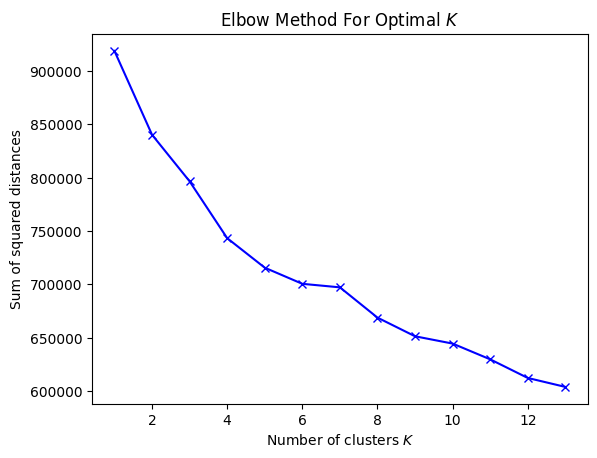

In [82]:
# Search for "optimal" number of clusters
SS_dist = []
K = range(1,14)
for num_clusters in K :
  kmeans = KMeans(n_clusters=num_clusters, random_state=0)
  kmeans.fit(df_standardized)
  SS_dist.append(kmeans.inertia_)
plt.plot(K,SS_dist,'bx-')
plt.xlabel('Number of clusters $K$')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal $K$')
plt.show()

In [83]:
def clustering_performance(method_name, implementation):
  print(f"Silhouette Score for {method_name}:", silhouette_score(df_standardized, implementation.labels_),
        f"\nDavies-Bouldin Score for {method_name}:", davies_bouldin_score(df_standardized, implementation.labels_), "\n")

# Sklearn implementation of K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=0).fit(df_standardized)
clustering_performance("K-Means Clustering", kmeans)

Silhouette Score for K-Means Clustering: 0.0860837151512054 
Davies-Bouldin Score for K-Means Clustering: 2.439121609629238 



In [84]:
# Sklearn implementation of Agglomerative Clustering
agg_clust = AgglomerativeClustering(n_clusters=2, linkage='ward').fit(df_standardized)
clustering_performance("Agglomerative Clustering", agg_clust)

Silhouette Score for Agglomerative Clustering: 0.10377867950183589 
Davies-Bouldin Score for Agglomerative Clustering: 2.3984117854135816 



In [85]:
agg_clust = AgglomerativeClustering(n_clusters=16, linkage='ward').fit(df_standardized)
clustering_performance("Agglomerative Clustering", agg_clust)

Silhouette Score for Agglomerative Clustering: 0.08631578092426884 
Davies-Bouldin Score for Agglomerative Clustering: 1.8909200318481338 



In [86]:
# Sklearn implementation of DBSCAN
db = DBSCAN(eps=30, min_samples=10).fit(df_standardized)
clustering_performance("DBSCAN", db)

Silhouette Score for DBSCAN: 0.7390080132470823 
Davies-Bouldin Score for DBSCAN: 0.28098897043269205 



In [87]:
# Sklearn implementation of K-Medoids Clustering
kmedoids = KMedoids(n_clusters=3, init='k-medoids++', random_state=0).fit(df_standardized)
clustering_performance("K-Medoids Clustering", kmedoids)

Silhouette Score for K-Medoids Clustering: 0.0945079274747989 
Davies-Bouldin Score for K-Medoids Clustering: 2.8097023700825616 



In [88]:
# Perform k-medians clustering
np.random.seed(0) # (for reproducibility)
initial_medians = df_standardized.iloc[np.random.permutation(df_standardized.shape[0])[:2],:].values.tolist()
kmedians_instance = kmedians(df_standardized, initial_medians)
kmedians_instance.process()
clusters = kmedians_instance.get_clusters()

# Assign cluster labels
labels = np.zeros(df_standardized.shape[0], dtype=int)
for cluster_index, cluster_points in enumerate(clusters):
  for point_index in cluster_points:
    labels[point_index] = cluster_index

# Evaluate performance metrics
print("Silhouette Score for K-Medians Clustering:", silhouette_score(df_standardized, labels),
      "\nDavies-Bouldin Score for K-Medians Clustering:", davies_bouldin_score(df_standardized, labels))

Silhouette Score for K-Medians Clustering: 0.590335303842863 
Davies-Bouldin Score for K-Medians Clustering: 0.5148448598791862


In [89]:
# Perform Density-Based Spatial Clustering of Applications with Noise (DBSCAN)
db = DBSCAN(eps=30, min_samples=10).fit(df_standardized)
Partition_vec = db.labels_

In [90]:
set(db.labels_)

{-1, 0, 1}

In [91]:
# Count the number of noise points (labeled as -1)
list(db.labels_).count(-1)

2

In [92]:
# Exclude noise points
data_points = df_standardized.iloc[db.labels_ != -1]
Partition_vec = Partition_vec[db.labels_ != -1]

In [93]:
cluster_1_data = scaler.inverse_transform(data_points[Partition_vec == 0])
print("Descriptive Statistics for Cluster 1:\n",
      pd.DataFrame(cluster_1_data, columns=data_points.columns).describe())

Descriptive Statistics for Cluster 1:
        bathrooms   bedrooms  has_photo   latitude  longitude  \
count 17322.0000 17322.0000 17322.0000 17322.0000 17322.0000   
mean      1.4769     1.7082     0.8977    36.4811  -117.6797   
std       0.5772     0.7574     0.3030     4.8633     3.2385   
min       1.0000     0.0000    -0.0000    31.3517  -123.3483   
25%       1.0000     1.0000     1.0000    33.7167  -118.6051   
50%       1.0000     2.0000     1.0000    34.0663  -118.1168   
75%       2.0000     2.0000     1.0000    36.2811  -115.2838   
max       9.0000     8.0000     1.0000    48.1818  -109.5450   

       violent_crime_rate  property_crime_rate  population    density  \
count          17322.0000           17322.0000  17322.0000 17322.0000   
mean             493.0642            2867.4763  37993.2204  2424.4232   
std              231.1639             935.5415  10914.5044  1761.8837   
min               60.3380             996.2702    657.0000     2.1000   
25%              34

In [94]:
cluster_2_data = scaler.inverse_transform(data_points[Partition_vec == 1])
print("Descriptive Statistics for Cluster 1:\n",
      pd.DataFrame(cluster_2_data, columns=data_points.columns).describe())

Descriptive Statistics for Cluster 1:
        bathrooms  bedrooms  has_photo  latitude  longitude  \
count    14.0000   14.0000    14.0000   14.0000    14.0000   
mean      1.6786    1.9286     1.0000   34.0683  -118.3250   
std       0.5409    0.2673     0.0000    0.0347     0.0870   
min       1.0000    1.0000     1.0000   34.0107  -118.4914   
25%       1.0000    2.0000     1.0000   34.0490  -118.3708   
50%       2.0000    2.0000     1.0000   34.0607  -118.3265   
75%       2.0000    2.0000     1.0000   34.0983  -118.2401   
max       2.5000    2.0000     1.0000   34.1236  -118.2397   

       violent_crime_rate  property_crime_rate  population   density  \
count             14.0000              14.0000     14.0000   14.0000   
mean             741.0127            2802.0702  34245.6840 5437.7141   
std               32.2066             810.3170   9631.0410 1003.2789   
min              670.7332            2477.4166  18976.0000 3621.8000   
25%              747.0109            2477.

In [95]:
# Perform 2-medians clustering
np.random.seed(0)
initial_medians = df_standardized.iloc[np.random.permutation(df_standardized.shape[0])[:2],:].values.tolist()
kmedians_instance = kmedians(df_standardized, initial_medians)
kmedians_instance.process()
clusters = kmedians_instance.get_clusters()
labels = np.zeros(df_standardized.shape[0], dtype=int)
for cluster_index, cluster_points in enumerate(clusters):
  for point_index in cluster_points:
    labels[point_index] = cluster_index
Partition_vec = labels

In [96]:
for cluster_label in range(2):
  cluster_points = scaler.inverse_transform(df_standardized.loc[Partition_vec == cluster_label])
  print(f"Cluster {cluster_label + 1}:\n", pd.DataFrame(cluster_points, columns=df_standardized.columns).describe().to_string(), "\n")

Cluster 1:
        bathrooms  bedrooms  has_photo  latitude  longitude  violent_crime_rate  property_crime_rate  population   density  dist_highway  dist2_large_airport  dist2_medium_airport  dist_to_shore  number_of_business  adjusted_gross_income  total_income_amount  Civilian_labor_force_2022  Median_Household_Income_2021  risk_score  risk_rating  avg_temp  allows_cats  allows_dogs  has_Refrigerator  has_Playground  has_Internet.Access  has_Cable.or.Satellite  has_Elevator  has_Clubhouse  has_Patio.Deck  has_Washer.Dryer  has_Pool  has_Tennis  has_Basketball  has_Luxury  has_Doorman  has_View  has_Wood.Floors  has_Dishwasher  has_Hot.Tub  has_Parking  has_Gym  has_Alarm  has_Garbage.Disposal  has_Storage  has_Golf  has_Gated  has_AC  has_TV  has_Fireplace  price_per_income  business_to_pop_ratio  unemployment_rate_avg
count    37.0000   37.0000    37.0000   37.0000    37.0000             37.0000              37.0000     37.0000   37.0000       37.0000              37.0000           

## Clustering for Market Segmentation with Dimension Reduction

In [97]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [98]:
# Apply PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_standardized)
print("PCA Explained Variance Ratio:", pca.explained_variance_ratio_)

PCA Explained Variance Ratio: [0.12218907 0.08765427]


In [99]:
# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=20, random_state=0)
df_tsne = tsne.fit_transform(df_standardized)
print("t-SNE Kullback-Leibler divergence:", tsne.kl_divergence_)

t-SNE Kullback-Leibler divergence: 1.070407748222351


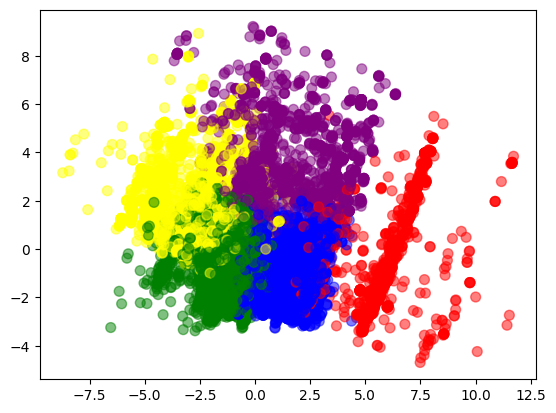

In [100]:
# Perform 5-means clustering
kmeans = KMeans(n_clusters=5, random_state=0).fit(df_standardized)
Partition_vec = kmeans.labels_

# Visualize the results on PCA-reduced data
colors = ['purple', 'blue', 'green', 'yellow', 'red']
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=[colors[label] for label in Partition_vec], s=50, alpha=0.5);

In [101]:
# Calculate the Euclidean distances between PCA-reduced data points and cluster centers
from sklearn.metrics import pairwise_distances
centers_pca = pca.transform(pd.DataFrame(kmeans.cluster_centers_, columns=df_standardized.columns))
distances = pairwise_distances(df_pca, centers_pca[Partition_vec], metric='euclidean')[:,0]
print("Mean Euclidean distance between data points and center of each cluster:")
for cluster_label in range(5):
  print(f"Cluster {cluster_label + 1} ({colors[cluster_label]}):", distances[Partition_vec == cluster_label].mean())

Mean Euclidean distance between data points and center of each cluster:
Cluster 1 (purple): 5.835805702617689
Cluster 2 (blue): 3.041735480647037
Cluster 3 (green): 1.144654130683682
Cluster 4 (yellow): 3.4139844940803576
Cluster 5 (red): 7.637599665754471


In the scatterplot above, some separation between the five clusters exists. The green cluster is the most compact (which indicates greater similarity among its apartments), while the red cluster shows more variation. There is noticeable overlap, suggesting that apartment features blend across segments rather than forming clearly distinct groups.

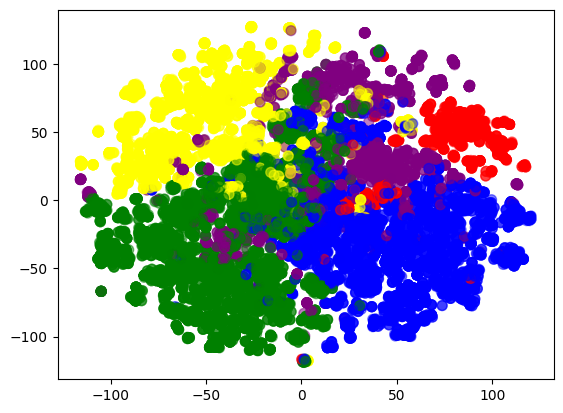

In [102]:
# Visualize the results on t-SNE projected data
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], c=[colors[label] for label in Partition_vec], s=50, alpha=0.5);

This t-SNE projection of data into two dimensions reveals significant overlap among the five apartment clusters derived from k-means, implying that their underlying features do not form strictly defined segments in the rental market.

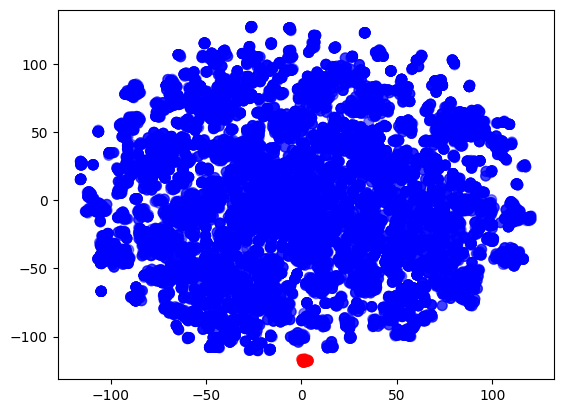

In [103]:
# Perform 2-medians clustering
np.random.seed(0)
initial_medians = df_standardized.iloc[np.random.permutation(df_standardized.shape[0])[:2],:].values.tolist()
kmedians_instance = kmedians(df_standardized, initial_medians)
kmedians_instance.process()
clusters = kmedians_instance.get_clusters()
labels = np.zeros(df_standardized.shape[0], dtype=int)
for cluster_index, cluster_points in enumerate(clusters):
  for point_index in cluster_points:
    labels[point_index] = cluster_index
Partition_vec = labels

# Visualize the results on t-SNE projected data
colors = ['red', 'blue']
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], c=[colors[label] for label in Partition_vec], s=50, alpha=0.5);

In the scatterplot above, nearly all data points belong to one cluster (colored in blue), while only 37 apartments are assigned to the other (colored in red). Thus, despite 2-medians clustering performing better than 4-means clustering in terms of silhouette score and Davies-Bouldin score, the results are highly imbalanced.

In [104]:
# Compute pairwise distance between the 5 cluster centers derived from k-means on PCA-reduced data
kmeans = KMeans(n_clusters=5, random_state=0).fit(df_standardized)
Partition_vec = kmeans.labels_
centers_pca = pca.transform(pd.DataFrame(kmeans.cluster_centers_, columns=df_standardized.columns))
pairwise_distances(centers_pca, metric='euclidean')

array([[0.        , 4.70368323, 5.54628717, 4.79480525, 5.76033028],
       [4.70368323, 0.        , 2.86248075, 5.09663324, 4.54890644],
       [5.54628717, 2.86248075, 0.        , 3.09315863, 7.37244086],
       [4.79480525, 5.09663324, 3.09315863, 0.        , 8.92672854],
       [5.76033028, 4.54890644, 7.37244086, 8.92672854, 0.        ]])

In [105]:
# Identify which features contribute most to the separation based on standard deviation across cluster centers
centers = pca.inverse_transform(centers_pca)
df_centers = pd.DataFrame(centers, columns=df_standardized.columns)
df_centers.index = [f'Cluster {i+1}' for i in range(5)]
feature_std = df_centers.std(axis=0)
top_features = feature_std.sort_values(ascending=False).head(15)
print(top_features)

dist_to_shore                  1.0758
Median_Household_Income_2021   1.0511
longitude                      1.0492
risk_rating                    1.0269
total_income_amount            0.9427
adjusted_gross_income          0.9423
avg_temp                       0.8974
risk_score                     0.7895
number_of_business             0.7569
dist2_large_airport            0.7514
unemployment_rate_avg          0.7450
latitude                       0.6966
has_Dishwasher                 0.6190
dist_highway                   0.6104
has_Refrigerator               0.5406
dtype: float64


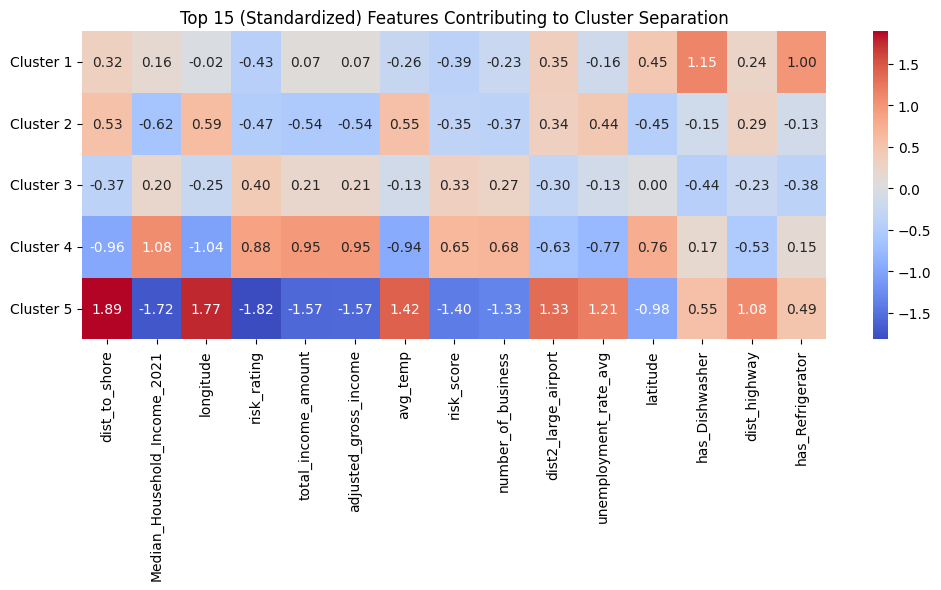

In [106]:
plt.figure(figsize=(12, 4))
sns.heatmap(df_centers[top_features.index], cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Top 15 (Standardized) Features Contributing to Cluster Separation")
plt.show()

In [107]:
# Show unscaled values of the top features contributing to cluster separation
unscaled_centers = scaler.inverse_transform(df_centers)
pd.DataFrame(unscaled_centers[:, df_centers.columns.get_indexer(top_features.index)],
             columns=top_features.index, index=df_centers.index)

,dist_to_shore,Median_Household_Income_2021,longitude,risk_rating,total_income_amount,adjusted_gross_income,avg_temp,risk_score,number_of_business,dist2_large_airport,unemployment_rate_avg,latitude,has_Dishwasher,dist_highway,has_Refrigerator
Cluster 1,210.0101,86334.0819,-117.7313,0.8291,1839026.4851,1822719.0631,58.2933,98.2177,835.3469,47.2046,4.0327,38.6461,0.6100,4.2583,0.5431
Cluster 2,251.5887,72805.6891,-115.7749,0.8223,1262654.6495,1248141.5285,63.4606,98.3103,787.1467,46.6937,4.5831,34.2762,0.1167,4.4528,0.1201
Cluster 3,73.5848,86958.1231,-118.4992,0.9541,1969145.6783,1948420.1225,59.1494,99.6411,1010.0919,19.9690,4.0603,36.5027,0.0091,2.2369,0.0259
Cluster 4,-42.6680,102157.2047,-121.0476,1.0262,2670222.0358,2645239.2345,53.9098,100.2751,1153.4372,6.4503,3.4693,40.1999,0.2409,0.9779,0.2237
Cluster 5,518.8264,53626.2638,-111.9518,0.6196,285198.3475,279942.5560,69.0915,96.2308,451.6545,88.1814,5.2814,31.7123,0.3831,7.8450,0.3514
